In [1]:
# load libraries

import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
# load dataset

pima = pd.read_csv("Dataset_of_Diabetes.csv")
pima.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [3]:
# determine target (dependent) and feature (independent) variables

feature_cols = ['ID', 'No_Pation', 'Chol', 'AGE', 'Urea', 'Cr', 'HbA1c', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI']
X = pima[feature_cols] # features
y = pima.Gender # target

In [4]:
# split dataset into training and test set (70:30) ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [6]:
# create Decision Tree classifier object
clf = DecisionTreeClassifier()
# train Decision Tree Classifier
clf = clf.fit(X_train,y_train)
# predict the response for test dataset
y_pred = clf.predict(X_test)

In [7]:
# compute accuracy (i.e., how often is the classifier correct?)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7033333333333334


## Visualizing the tree

We will plot the tree to see its root, branches, and nodes using the following functions:

* **StringIO()**: creates an object (empty in this case) to receive a string buffer (the tree will be created first as a string before as an image) in DOT (graph description language) format.
* **export_graphviz()**: this function exports the tree in DOT format, generating a representation of the decision tree, which is written into the ‘out_file’.
* **graph_from_dot_data()**: will use the DOT object to create the graph.
* **Image()**: uses raw data to return an image (png, jpeg, gif).

In [11]:
# import libraries for decision tree visualization

from sklearn.tree import export_graphviz
from six import StringIO 
from IPython.display import Image  
import pydotplus

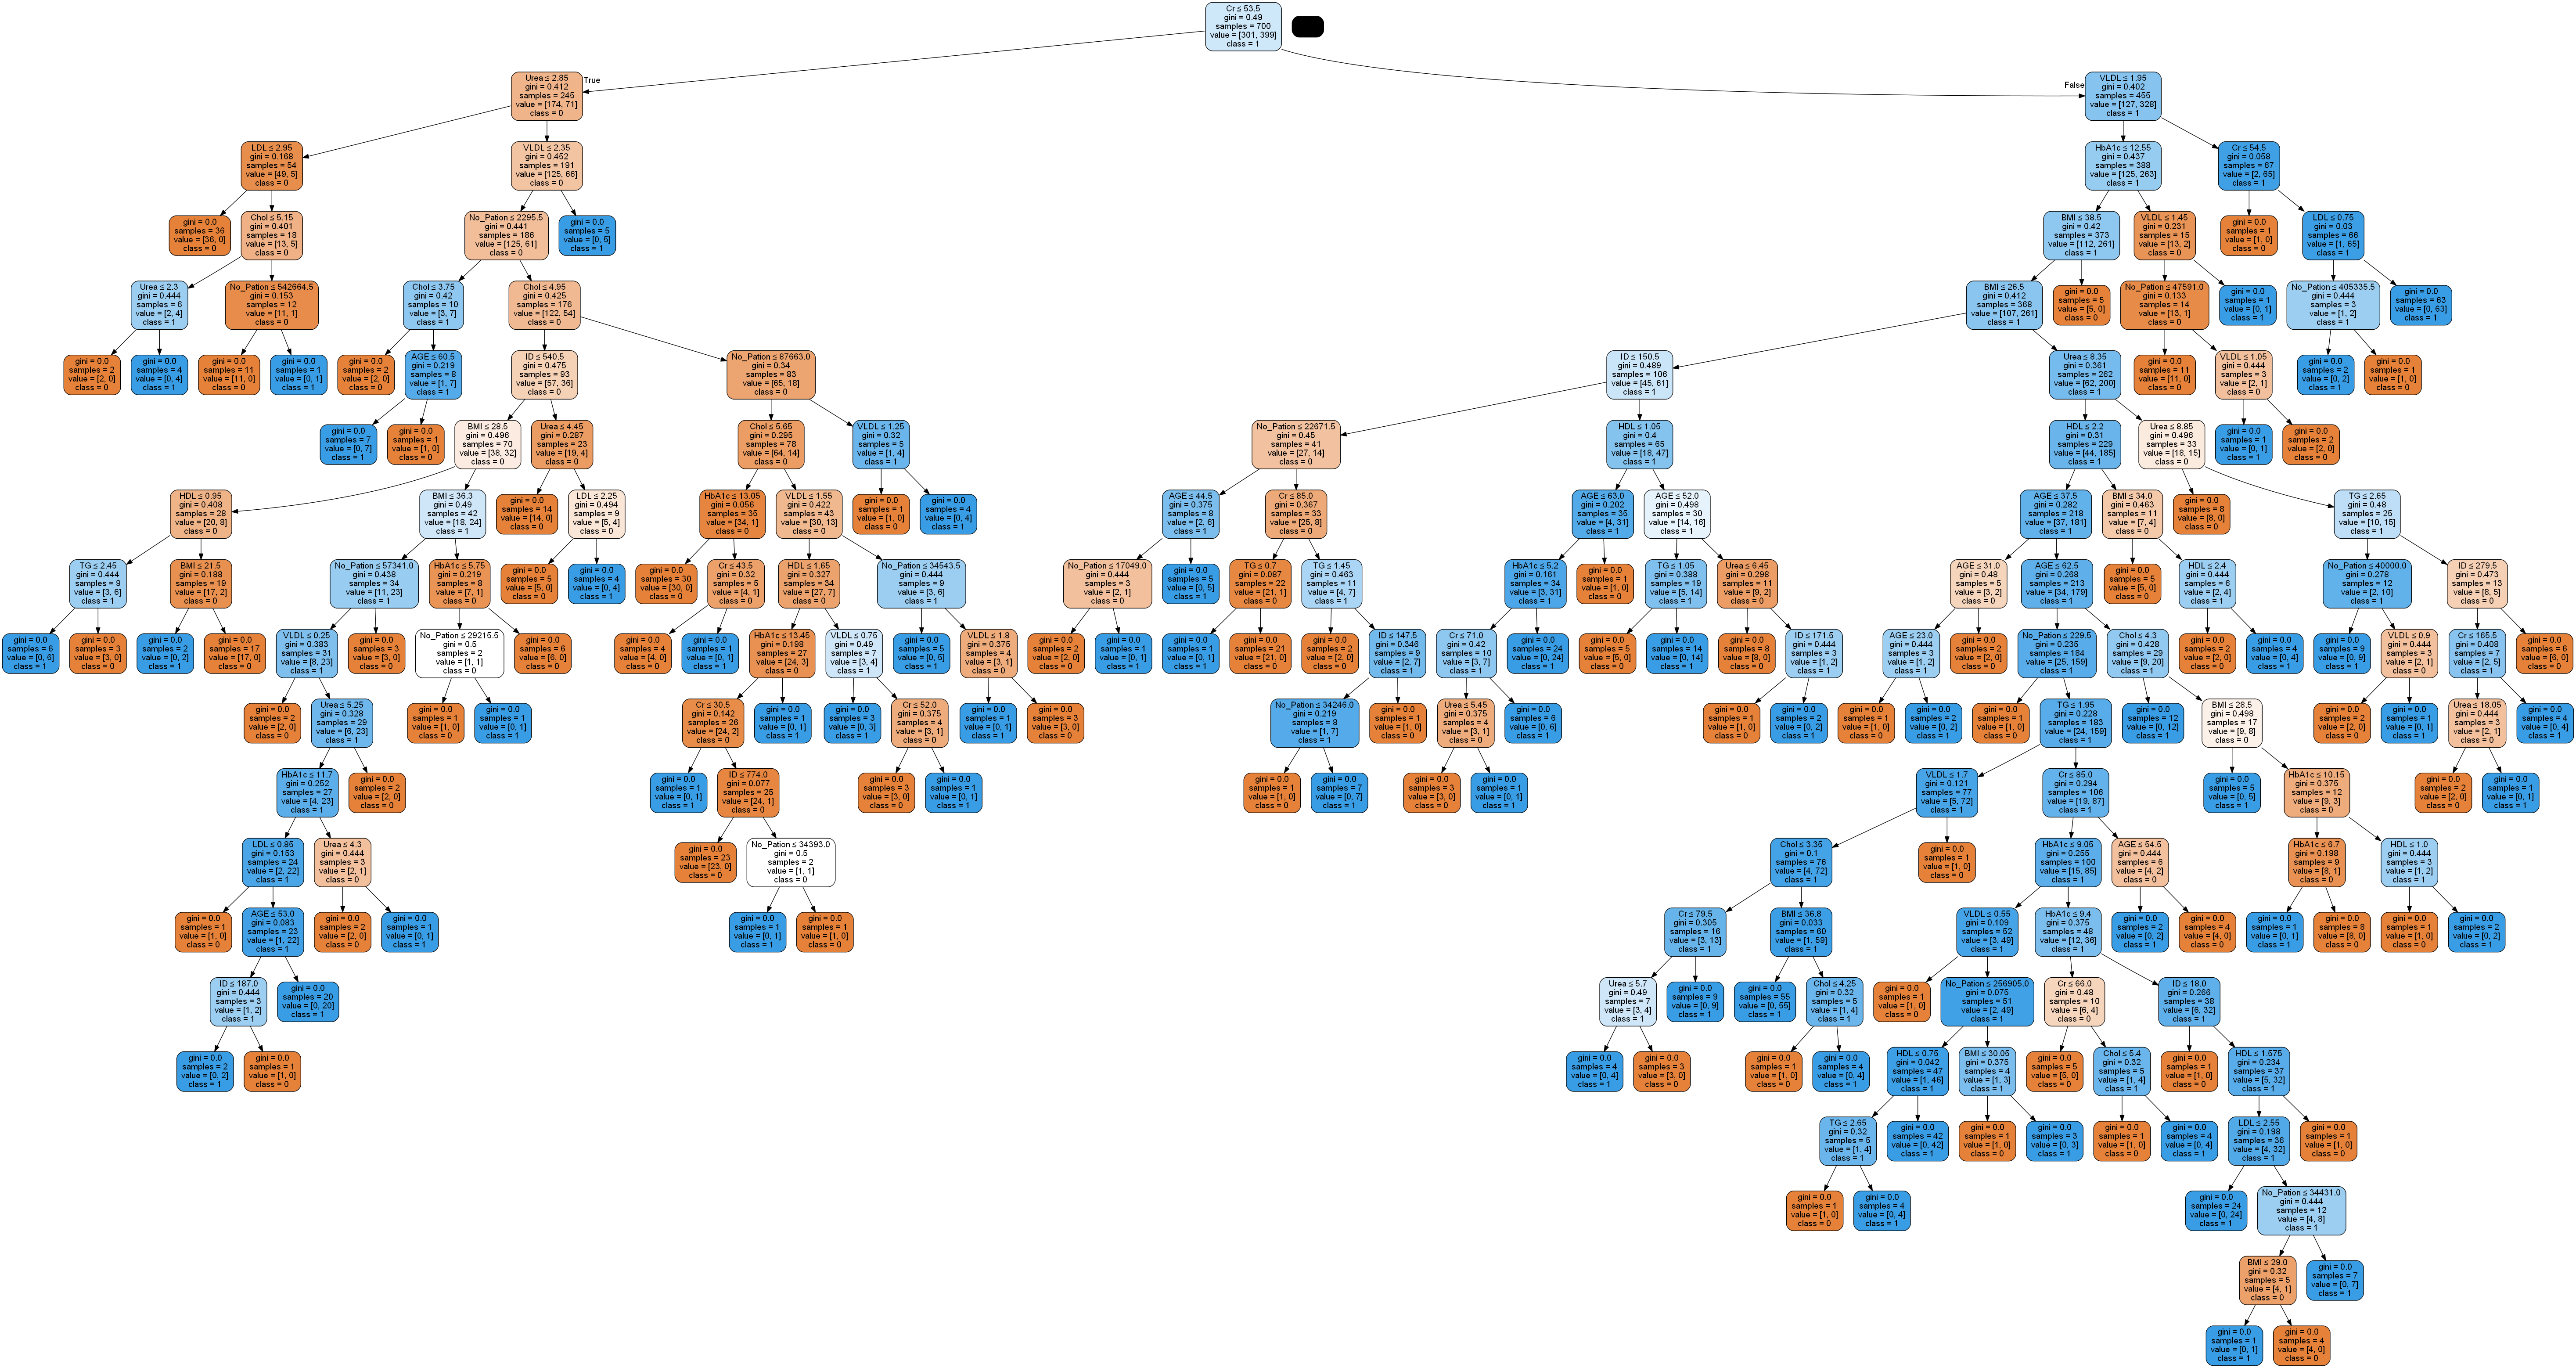

In [12]:
# visualize decision tree

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names = feature_cols,
                class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())